# **SIFT Detector**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

The **Scale-Invariant Feature Transform (SIFT)** is a computer vision algorithm used for detecting and describing local features (i.e. keypoints) in images. **Keypoints** refer to distinctive and informative patterns that can be used for object recognition, image matching/stitching, and image tracking.   

Instead of delving into the intricacies of the SIFT algorithm (Homework 2 goes into depth about that), let's proceed directly to its implementation in OpenCV. For this demonstration, we'll attempt to identify a box of Reese's Puffs in a supermarket aisle of cereal boxes.

## **SIFT (Without KNN or Ratio Test)**

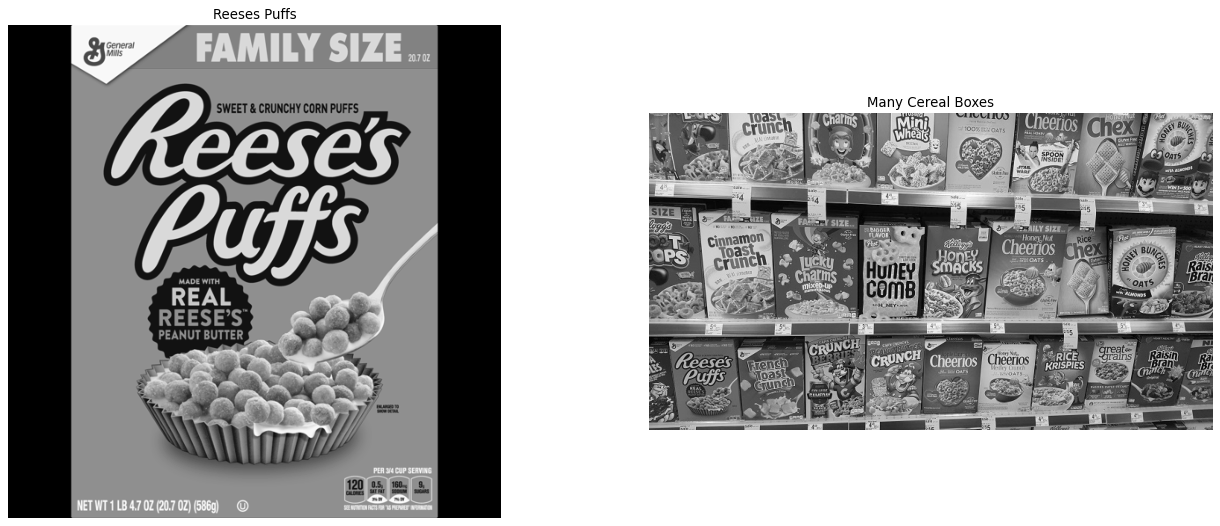

In [2]:
reeses_puffs = cv2.imread('data/images/reeses_puffs.png', cv2.IMREAD_GRAYSCALE)
many_cereals = cv2.imread('data/images/many_cereals.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize = (20, 8))

plt.subplot(121)
plt.imshow(reeses_puffs, cmap = 'gray')
plt.title("Reeses Puffs")
plt.axis('off')

plt.subplot(122)
plt.imshow(many_cereals, cmap = 'gray')
plt.title("Many Cereal Boxes")
plt.axis('off');

To begin with, we'll create a "SIFT detector object" using OpenCV's `cv2.SIFT_create()` function. This function takes an optional parameter `nfeatures` that allows us to specify the maximum number of features to detect.

`cv2.SIFT_create(nfeatures = 0)`

- **nfeatures**: The number of features to detect. The default value is 0. When set to 0, the algorithm will detect and retain as many keypoints as possible.

> In OpenCV, version 3.x, the SIFT algorithm was available as part of the `xfeatures2d` module. To create a SIFT detector, you would write `cv2.xfeatures2d.SIFT_create()`. In OpenCV version 4.x, the `xfeatures2d` module has been deprecated. Therefore, in newer versions, you should use `cv2.SIFT_create()` directly to create a SIFT detector.

In [3]:
detector = cv2.SIFT_create()

Next, for each image, we'll determine the keypoints and then compute the descriptors for those keypoints. The purpose of these keypoints and descriptors is to capture distinctive information about the image that can be later used for matching or recognition.

OpenCV allows us to compute keypoints and descriptors individually or simultaneously. The first option is performed by calling the `detect()` method of the SIFT object, followed by passing the results into `compute()`:

`keypoints = detect(image[, mask])`

- **image**: The input image for which the keypoints are to be computed.
- **mask**: Specify a region of interest (ROI) within the image. The algorithm will restrict its operation to the specified region defined by the mask.

`keypoints, descriptors = compute(image, keypoints[, descriptors])`

- **image**: The input image.
- **keypoints**: The keypoints for the passed in image.

Alternatively, you could determine the keypoints and descriptors simultaneously using the `detectAndCompute()` method:

`keypoints, descriptors = detectAndCompute(image, mask])`

- **image**: The input image for which key points and descriptors are to be computed. 
- **mask**: Specify a region of interest (ROI) within the image. The algorithm will restrict its operation to the specified region defined by the mask.

In [4]:
keypoints1, descriptors1 = detector.detectAndCompute(reeses_puffs, None)
keypoints2, descriptors2 = detector.detectAndCompute(many_cereals, None)

# Alternatively

# keypoints1 = detector.detect(reeses_puffs, None)
# _, descriptors1 = detector.compute(reeses_puffs, keypoints1)

# keypoints2 = detector.detect(many_cereals, None)
# _, descriptors2 = detector.compute(many_cereals, keypoints2)

The function call returns two entities:

- **keypoints**: Holds a list of `cv2.KeyPoint` objects.
- **descriptors**: Holds the corresponding set of descriptors for the keypoints. Descriptors are numerical representations that describe the neighborhood around a keypoint.

Let us see how many features we obtained for each image. 

In [5]:
print(f"Number of interesting features (keypoints) in \'Reese's Puffs\': {len(keypoints1)}")
print(f"Number of interesting features (keypoints) in \'Many Cereals\': {len(keypoints2)}")

Number of interesting features (keypoints) in 'Reese's Puffs': 1501
Number of interesting features (keypoints) in 'Many Cereals': 3744


Note that we obtained many more features in the second image, since it is a bigger image. 

Moving on, each `cv2.KeyPoint` object holds information about the coordinates of the keypoint, along with the magnitude and angle. We can see this as follows:

In [6]:
print(f"keypoint 0 at {keypoints1[0].pt} with a magnitude of {keypoints1[0].size:.2f} and at an angle of {keypoints1[0].angle:.2f} degrees.")
print(f"keypoint 1 at {keypoints1[1].pt} with a magnitude of {keypoints1[1].size:.2f} and at an angle of {keypoints1[1].angle:.2f} degrees.")
print(f"...")
print(f"keypoint 1500 at {keypoints1[1500].pt} with a magnitude of {keypoints1[1500].size:.2f} and at an angle of {keypoints1[1500].angle:.2f} degrees.")

keypoint 0 at (73.114501953125, 42.08695983886719) with a magnitude of 2.48 and at an angle of 352.74 degrees.
keypoint 1 at (74.275634765625, 41.13429641723633) with a magnitude of 4.50 and at an angle of 354.54 degrees.
...
keypoint 1500 at (486.46563720703125, 51.40629959106445) with a magnitude of 2.43 and at an angle of 178.94 degrees.


### **Drawing Keypoints**

Instead of listing the keypoints manually, we may also plot the keypoints using `cv2.drawKeypoints()`.

`cv2.drawKeypoints(image, keypoints, outImage[, color = [, flags]])`

- **image**: The original image on which you want to draw the keypoints.
- **keypoints**: The list of keypoints for the passed image.
- **outImage**: An optional parameter that specifies the output image where the keypoints will be drawn.
- **color**: The color of the keypoints. It is specified as a tuple in BGR format.
- **flags**: Additional drawing options:
    - **cv2.DRAW_MATCHES_FLAGS_DEFAULT**: Default value. Draws keypoints without any additional information.
    - **cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS**: Draws keypoints with additional information, such as size and orientation. This can be useful for visualizing more details about each detected keypoint.

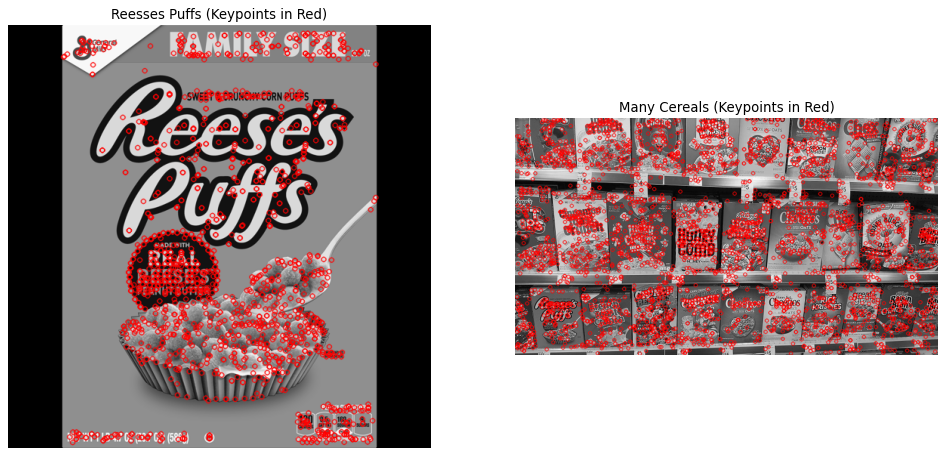

In [7]:
result1 = cv2.drawKeypoints(
                            image = reeses_puffs, 
                            keypoints = keypoints1, 
                            outImage = None, 
                            color = (0, 0, 255), 
                            flags = cv2.DRAW_MATCHES_FLAGS_DEFAULT # Try using the other option to see the difference
)

result2 = cv2.drawKeypoints(
                            image = many_cereals, 
                            keypoints = keypoints2, 
                            outImage = None, 
                            color = (0, 0, 255), 
                            flags = cv2.DRAW_MATCHES_FLAGS_DEFAULT
)


result1 = cv2.cvtColor(result1, cv2.COLOR_BGR2RGB)
result2 = cv2.cvtColor(result2, cv2.COLOR_BGR2RGB)


plt.figure(figsize = (15, 15))

plt.subplot(121)
plt.axis('off')
plt.imshow(result1)
plt.title("Reesses Puffs (Keypoints in Red)");

plt.subplot(122)
plt.axis('off')
plt.imshow(result2)
plt.title("Many Cereals (Keypoints in Red)");

Our next task involves comparing both images, specifically by comparing their descriptors. We can do this using `cv2.BFMatcher`. 

The `cv2.BFMatcher` is a class in OpenCV that stands for "Brute-Force Matcher." It is used for matching keypoint descriptors between two sets of images. The brute-force matcher compares each descriptor in the first set to every descriptor in the second set and finds the best matches based on a specified distance metric.

`cv2.BFMatcher([normType[, crossCheck]])`
- normType = Specifies the distance measurement technique to be used for comparing distances.
    - **cv2.NORM_L1**: Manhattan distance.
    - **cv2.NORM_L2**: Euclidean distance. (Default Value)
- **crossCheck** = When set to True, enforces a reciprocal check between the matches. In other words, if the matching algorithm finds a match from the first set of keypoints to the second set, it checks if the match from the second set back to the first set is also the best match. If not, that match is rejected. (Default Value = False)

In [8]:
bf = cv2.BFMatcher(crossCheck = True)

Now that we have a Brute-Force Matcher object, we can employ the `match` method.

In [9]:
matches = bf.match(descriptors1, descriptors2)

The method finds and returns a list of `DMatch` objects, where each object represents a potential match between a keypoint in the first image and a keypoint in the second image. The lower the distance between two descriptors, the higher the correspondence between them. Conversely, the higher the distance between the two descriptors, the lower the correspondence between them.

For example, let's take the first keypoint in our image (Reese's Puffs) and see what keypoint it was matched to in the second image (Many Cereals):

In [10]:
keypoint_number_in_first_image = matches[0].queryIdx # returns the index of the keypoint from the first image
keypoint_number_in_second_image = matches[0].trainIdx # returns the index of the matched keypoint from the second image
distance = matches[0].distance # returns the computed distance between the two keypoints.

print(f"Keypoint '{keypoint_number_in_first_image}' in \"Reese's Puffs\" was matched to keypoint '{keypoint_number_in_second_image}' in \"Many Cereals\" with a computed distance of {distance:.2f}")
print(f"Keypoint '{matches[1].queryIdx}' in \"Reese's Puffs\" was matched to keypoint '{matches[1].trainIdx}' in \"Many Cereals\" with a computed distance of {matches[1].distance:.2f}")

Keypoint '0' in "Reese's Puffs" was matched to keypoint '3502' in "Many Cereals" with a computed distance of 221.57
Keypoint '2' in "Reese's Puffs" was matched to keypoint '161' in "Many Cereals" with a computed distance of 236.98


> Notice how Keypoint '1' does not show up. This is because we have the `crossCheck` parameter set to `True`. This means that when the matcher finds the closest descriptor to keypoint '1',  it also checks the reverse: whether the the matched descriptor (from the second image) is also the closest to keypoint '1'. If the match is not symmetric, then the match is dropped, and those keypoints are not included in the final result.

### **Matching the Descriptors**

Moving on, we will now sort the `DMatch` objects in terms of the computed distance of the descriptors, in ascending order (lowest to highest). This will cause the good matches (lower computed distance) to appear at the start and the bad matches (higher computed distance) to move to the end of the `matches` list.

However, when sorting the matches list, it's essential to note that the list consists of objects (`DMatch` instances), and these objects lack an inherent numerical value. To make the sorting meaningful, we need to establish a basis for comparison among these objects. In this case, we assign a value to each object, and the chosen value is the computed distance. Remember, that this property is stored in the `distance` property of each `DMatch` object.

For the actual sorting, we'll make use of Python's built-in `sorted` function, which, by default, sorts in ascending order:

`sorted(iterable, key, reverse)`
- **iterable**: The sequence (list, tuple, string, etc.) to be sorted.
- **key**: A function that takes an element from the iterable and assigns it a numeral value to it. (Default Value = None)
- **reverse**: When set to `True`, will sort the list in descending order. (Default Value = False)

In the code below, every `DMatch` object is represented as `x` and is assigned the value of `x.distance` (This holds the computed distance for that descriptor). The outcome is a reordered list where matches with smaller distances, signifying greater similarity between keypoints, appear first.

In [11]:
matches = sorted(matches, key = lambda x:x.distance)

You can check the number of matches by running `len(matches)`. 

In [12]:
len(matches)

658

You'll notice that we received a ridiculous number of matches, not all of which are accurate. Remember, that `matches` is a list of matches sorted according to computed distances. The closer an element is to the beginning of this list, the higher the chance it is a good match.

We can visualize these matches using the `cv2.drawMatches()` function:

`cv2.drawMatches(img1, keypoints1, im2, keypoints2, matches1to2, outImg[, matchColor[, singlePointColor[, flags]]])`

- **img1**: The first source image.
- **keypoints1**: A list of keypoints detected in the first image.
- **img2**: The second source image.
- **keypoints2**: A list of keypoints detected in the second image.
- **matches1to2**: A list of `DMatch` objects representing the distances.
- **matchColor**: The color of the line to connect the matched keypoints. Specified as a tuple in BGR format.
- **singlePointColor**: The color of the keypoints that have no matches. Specified as a tuple in BGR format.
- **flags**: Additional drawing flags.
    - **cv2.DRAW_MATCHES_FLAGS_DEFAULT**: Draws keypoints without any additional information. (Default Value)
    - **cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS**: Avoids drawing unmatachable keypoints.
    - **cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS**: Draws keypoints with additional information, such as size and orientation. This can be useful for visualizing more details about each detected keypoint.

In [13]:
results = cv2.drawMatches(
                reeses_puffs, 
                keypoints1, 
                many_cereals, 
                keypoints2,
                matches[:25], # Only plot the first 25 accurate ones. This is why we sorted to begin with.
                None,
                matchColor = (0, 255, 0),
                flags = cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

# Try experimenting with the parameters to see the affect.

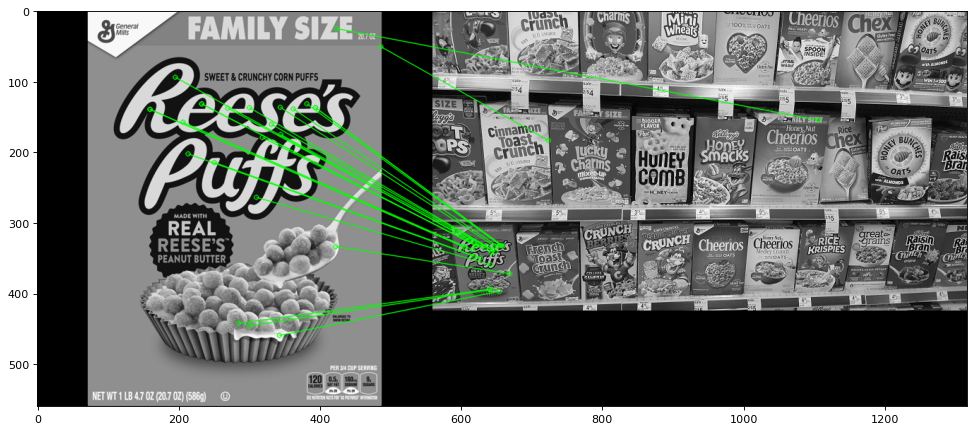

In [14]:
plt.figure(figsize = (15, 8))
plt.imshow(results);

If you're interested, you can try plotting all the matches we got:

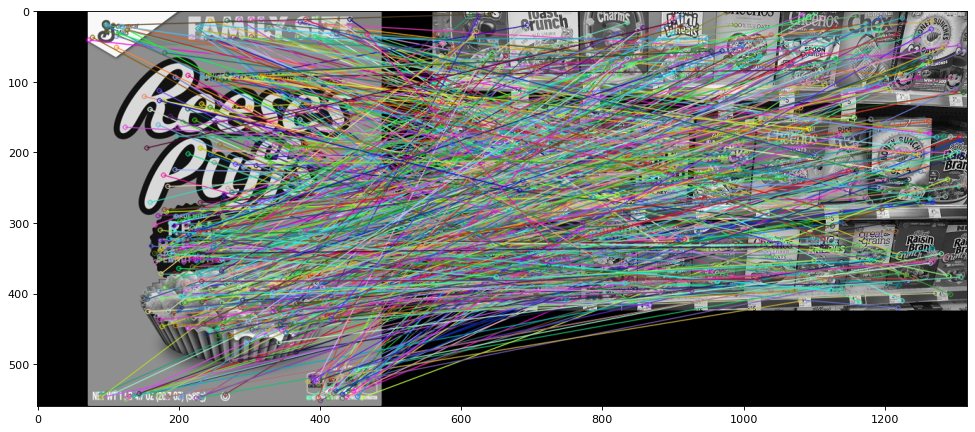

In [15]:
results = cv2.drawMatches(
                reeses_puffs, 
                keypoints1, 
                many_cereals, 
                keypoints2,
                matches, 
                None,
                flags = cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize = (15, 8))
plt.imshow(results);

## **SIFT w/ KNN and Ratio Test**

What if we don't want to sort? What if we want to limit the number of invalid matches? One solution is to apply the k-nearest neighbors (knn) matching technique along with a ratio test. 

The `cv2.BFMatcher.knnMatch()` is used for finding the k best matches between two sets of feature descriptors.

`matches = bf.knnMatch(descriptors1, descriptors2, k)`

- **descriptors1**: The descriptors of keypoints from the first image.
- **descriptors2**: The descriptors of keypoints from the second image.
- **k**: The number of best matches to be returned for each keypoint. It specifies how many nearest neighbors to find.

In other words, for each descriptor in the first image, it will find the k closest descriptors in the second image. 

In [16]:
detector = cv2.SIFT_create()

keypoints1, descriptors1 = detector.detectAndCompute(reeses_puffs, None)
keypoints2, descriptors2 = detector.detectAndCompute(many_cereals, None)

bf = cv2.BFMatcher()
# bf = cv2.BFMatcher(crossCheck = True) For some reason, this will give an error when used with knnMatch
matches = bf.knnMatch(descriptors1, descriptors2, k = 2)

In our scenario, for each keypoint identified in the first image, we'll get the two closest matching keypoints in the second image.

Now, with two potential matches for every keypoint in the first image, how do we determine the accuracy of these matches? We'll employ a ratio-based approach for this.

Basically, If the ratio of the distances between the best match and the second-best match is close to one, it implies that the two keypoints in the second image are highly similar. Therefore, we won't know whether to map the keypoint (from the first image) to the best matching keypoint (from the second image) or the second-best matching keypoint (from the second image). In this case, we'll just drop this match entirely labeling it as a "bad match".

On the other hand, if the ratio is significantly less than 1, it indicates that the first match is much closer than the second. This is because the second match must have a much higher (or just higher) computed distance than the first match (Recall that a higher computed distance implies a weaker correspondence). In such instances, we can confidently discard the second match and consider the first match as accurate labeling it as a "good match".

This ratio test acts as a filtering mechanism to separate reliable matches from potentially ambiguous ones. By applying this test, we effectively exclude matches where the distances between the top two candidates are too similar, thus enhancing the overall accuracy of our keypoint matching process.

In [17]:
good_matches = []
threshold = 0.5 # varies between 0 to 1. If set to 1, then good_matchs will be equal to matches so you're not really "filtering".

for match_1, match_2 in matches:
    if match_1.distance < threshold * match_2.distance:
        good_matches.append(match_1)

A note on `threshold`
- A higher value: Results in more matches not all of which are accurate. (More False Positives)
- A lower value: Results in fewer matches but more accurate ones. (Less False Positives)

In [19]:
number_of_initial_matches = len(matches)
number_of_good_matches = len(good_matches)
number_of_matches_dropped = number_of_initial_matches - number_of_good_matches

print(f"Initial # of Matches: {number_of_initial_matches}")
print(f"Final # of Matches: {number_of_good_matches:>4}")
print(f"{(number_of_matches_dropped/number_of_initial_matches * 100):.2f} % of initial matches were dropped")

Initial # of Matches: 1501
Final # of Matches:   44
97.07 % of initial matches were dropped


Finally, we can plot the matches (all of them this time, since we already dropped the ambiguous ones. This is also why we don't sort the matches this time around):

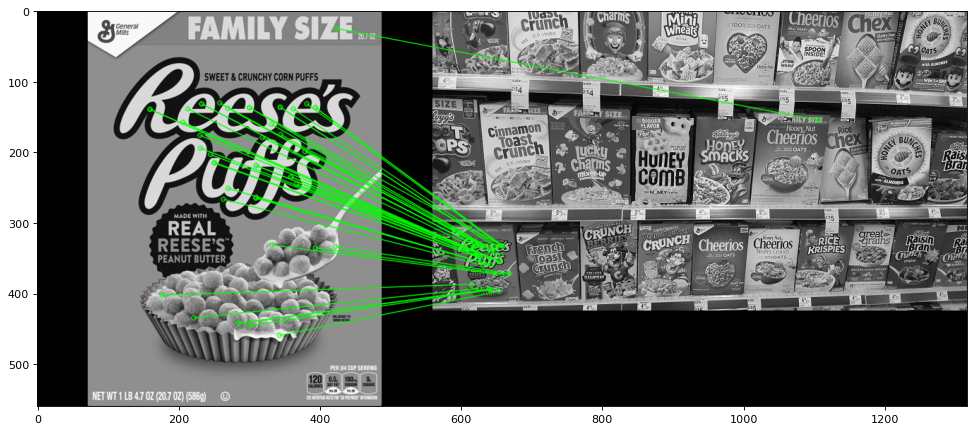

In [20]:
results = cv2.drawMatches(
                reeses_puffs, 
                keypoints1, 
                many_cereals, 
                keypoints2,
                good_matches, 
                None,
                matchColor = (0, 255, 0),
                flags = cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize = (15, 8))
plt.imshow(results);

To get rid of the outliers

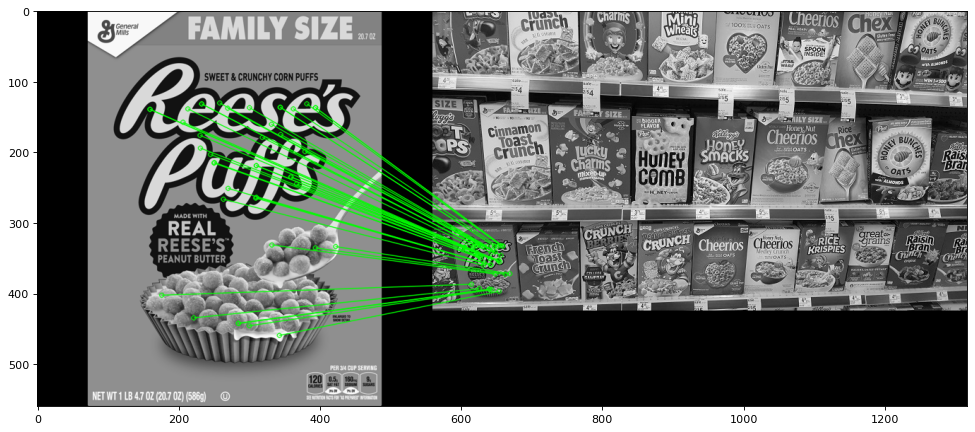

In [21]:
# Extract the matched keypoints
src_pts = np.float32([ keypoints1[m.queryIdx].pt for m in good_matches ]).reshape(-1,1,2)
dst_pts = np.float32([ keypoints2[m.trainIdx].pt for m in good_matches ]).reshape(-1,1,2)

# Use RANSAC to estimate the homography matrix (Actually, we only need the mask to know what points are outliers)
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, ransacReprojThreshold=5)

# Draw the matching 
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = mask.ravel().tolist(), # draw only inliers
                   flags = 2)

plt.figure(figsize=(15,15))
output_image = cv2.drawMatches(reeses_puffs,keypoints1,many_cereals,keypoints2, good_matches, None, **draw_params)
plt.imshow(output_image, 'gray')

plt.show()